# Introduction


We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.


Using visualizations, we can start to explore questions from the dataset like:

- Do students in more popular majors make more money?
    - Using scatter plots
- How many majors are predominantly male? Predominantly female?
    - Using histograms
- Which category of majors have the most students?
    - Using bar plots
    
We'll explore how to do these and more while primarily working in pandas. Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.

## Environment Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Data

In [2]:
recent_grad = pd.read_csv('recent-grads.csv')

In [3]:
recent_grad.iloc[1]

Rank                                                 2
Major_code                                        2416
Major                   MINING AND MINERAL ENGINEERING
Total                                              756
Men                                                679
Women                                               77
Major_category                             Engineering
ShareWomen                                    0.101852
Sample_size                                          7
Employed                                           640
Full_time                                          556
Part_time                                          170
Full_time_year_round                               388
Unemployed                                          85
Unemployment_rate                             0.117241
Median                                           75000
P25th                                            55000
P75th                                            90000
College_jo

In [4]:
recent_grad.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
recent_grad.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
recent_grad.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


### Dropping Missing Values

This is mainly for visualization. If there is missing values, matplot will throw an error. To avoid that, we'll drop rows that have missing values.

In [11]:
raw_data_count = recent_grad.shape[0]

In [12]:
raw_data_count

173

There are 173 rows total before dropping rows

In [14]:
recent_grad = recent_grad.dropna()

In [16]:
cleaned_data_count = recent_grad.shape[0]

In [17]:
cleaned_data_count

172

Surprisingly there was only one row that had missing values.

## Visualizatoin Through Pandas

Most of the plotting functionality in pandas is contained within the DataFrame.plot() method. When we call this method, we specify the data we want plotted as well as the type of plot. We use the *kind* parameter to specify the type of plot we want. We use *x* and *y* to specify the data we want on each axis. You can read about the different parameters in the documentation.

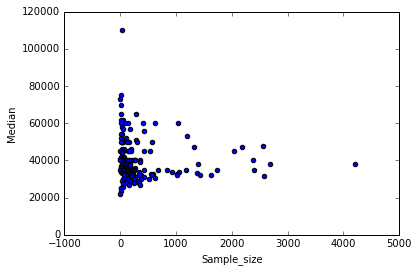

In [18]:
recent_grad.plot(x = 'Sample_size', y = 'Median', kind = 'scatter')

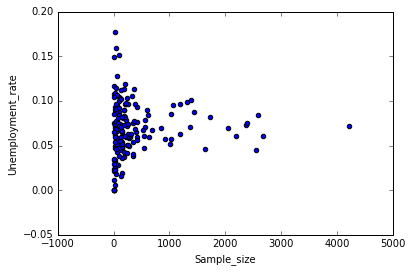

In [19]:
recent_grad.plot(x = 'Sample_size', y = 'Unemployment_rate', kind = 'scatter')

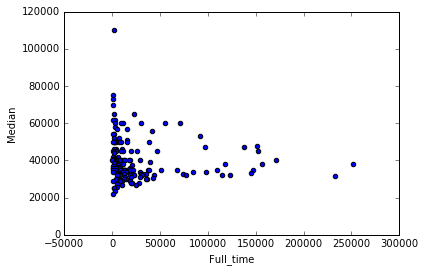

In [20]:
recent_grad.plot(x = 'Full_time', y = 'Median', kind = 'scatter')

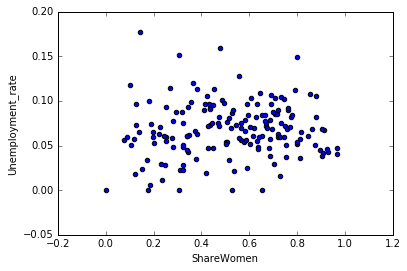

In [21]:
recent_grad.plot(x = 'ShareWomen', y = 'Unemployment_rate', kind = 'scatter')

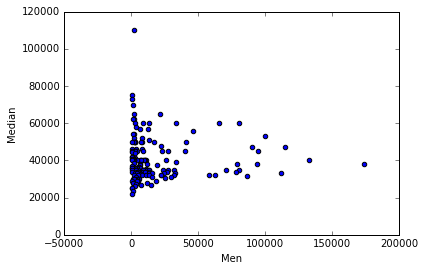

In [22]:
recent_grad.plot(x = 'Men', y = 'Median', kind = 'scatter')

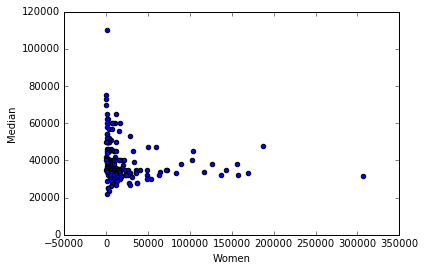

In [23]:
recent_grad.plot(x = 'Women', y = 'Median', kind = 'scatter')

None of these seems to show any strong relationship between variables.  

The popularity(Sample_size) doesn't seem to have any link to graduates median income. Popularity within a certain gender doesn't seem to link to higher gruates median income either. Likewise, whether it's fulltime or not doesn't seem to affect graduate median income. 

### Histogram

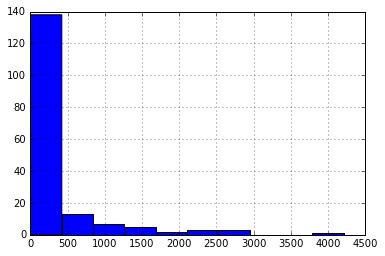

In [24]:
recent_grad['Sample_size'].hist()

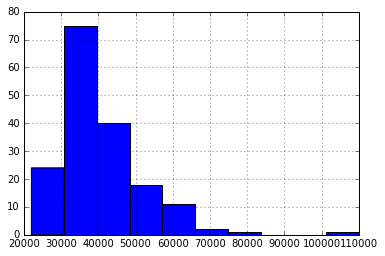

In [25]:
recent_grad['Median'].hist()

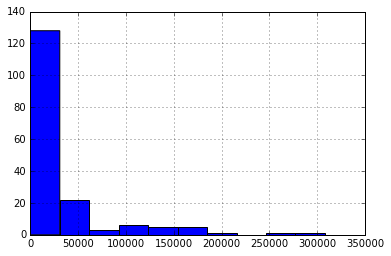

In [26]:
recent_grad['Employed'].hist()

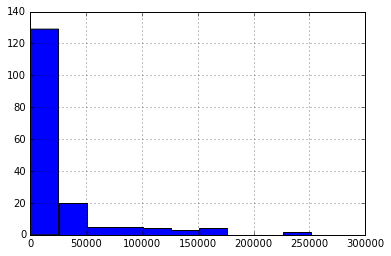

In [27]:
recent_grad['Full_time'].hist()

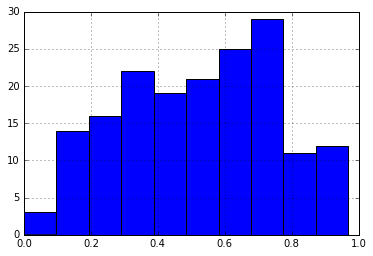

In [28]:
recent_grad['ShareWomen'].hist()

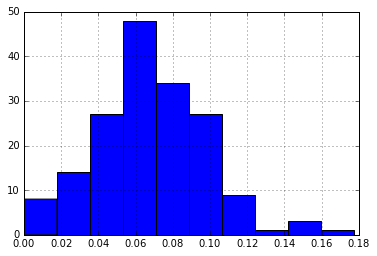

In [29]:
recent_grad['Unemployment_rate'].hist()

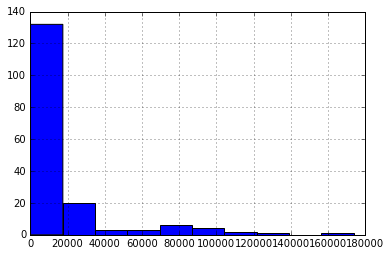

In [30]:
recent_grad['Men'].hist()

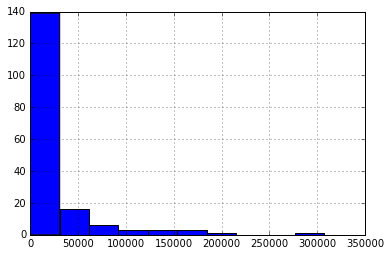

In [31]:
recent_grad['Women'].hist()

The most common median income is 30~40k. About 50% of majors are predominantly male and 50% of majors predominantly female.

### Scatter Matrix

Because scatter matrix plots are frequently used in the exploratory data analysis, pandas contains a function named *scatter_matrix()* that generates the plots for us. This function is part of the *pandas.plotting module* and needs to be imported separately. To generate a scatter matrix plot for 2 columns, select just those 2 columns and pass the resulting DataFrame into the *scatter_matrix()* function.

In [34]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde13ee3cc0>,
      dtype=object)

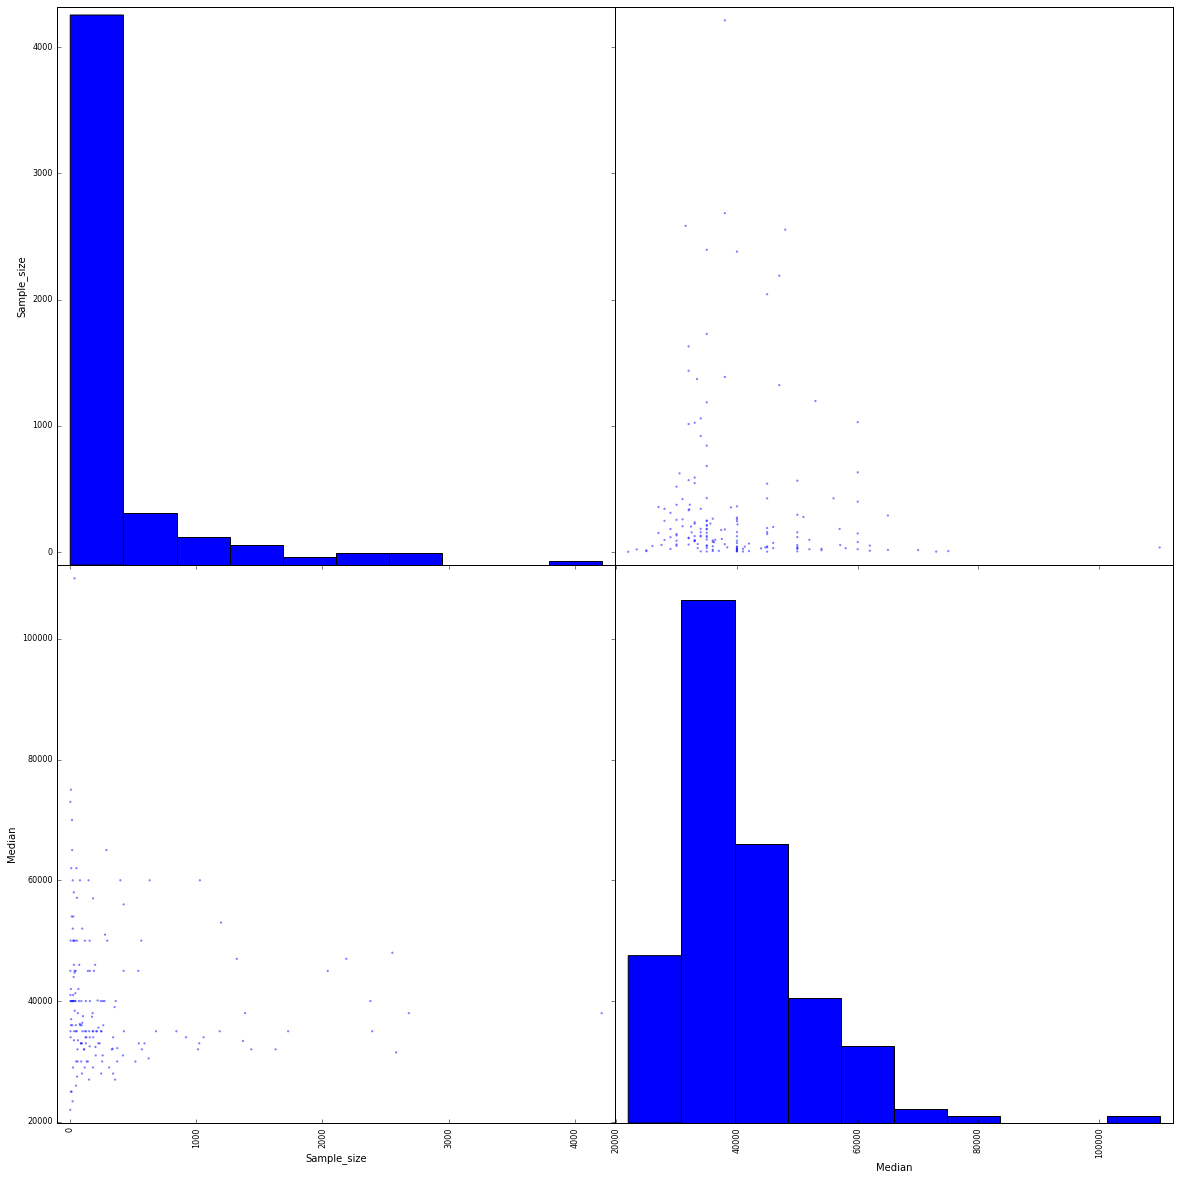

In [38]:
scatter_matrix(recent_grad[['Sample_size','Median']], figsize = (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde13cd69e8>,
      dtype=object)

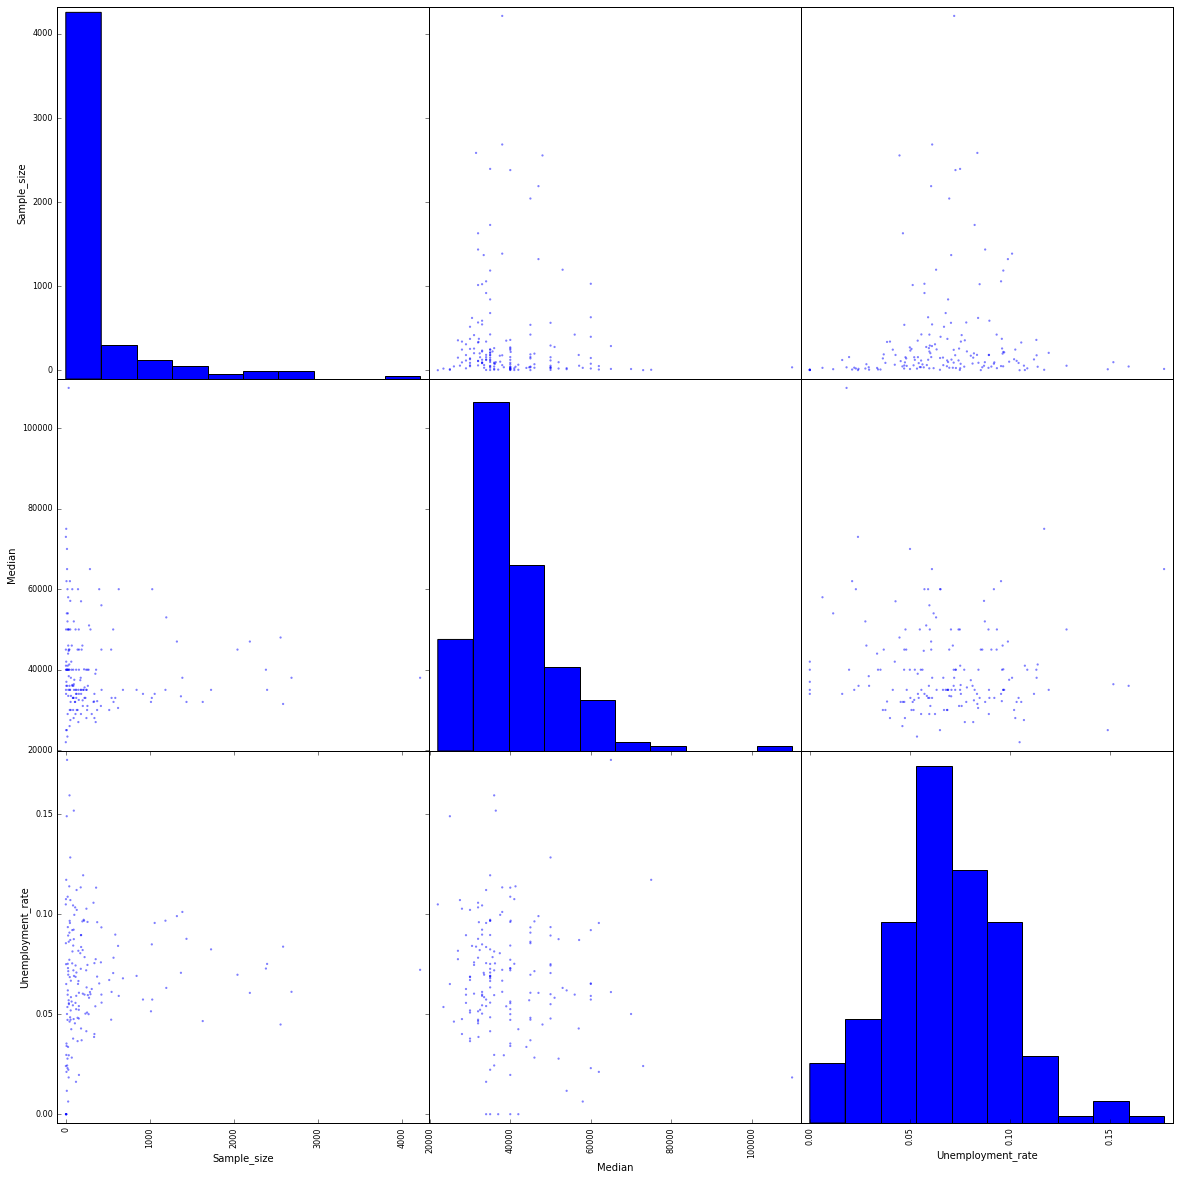

In [39]:
scatter_matrix(recent_grad[['Sample_size','Median','Unemployment_rate']], figsize = (20,20))

### Bar Plots

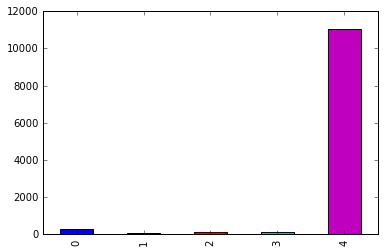

In [40]:
recent_grad[:5]['Women'].plot(kind='bar')

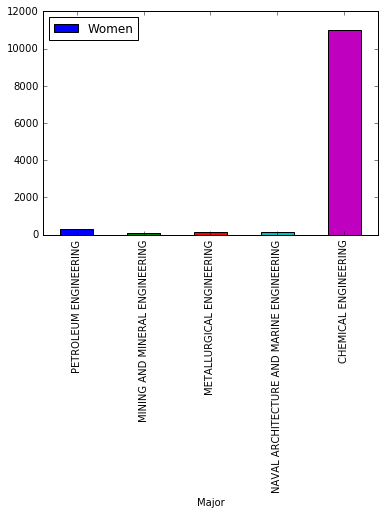

In [42]:
recent_grad[:5].plot.bar(x='Major', y='Women')